In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

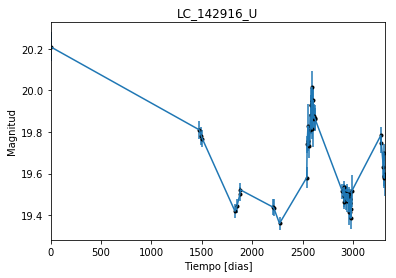

In [3]:
data = np.genfromtxt('LC_142916_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_142916_U')
plt.savefig("LC_142916_U.pdf")

In [4]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [5]:
%%capture capt
sample = model.run_mcmc(20000)

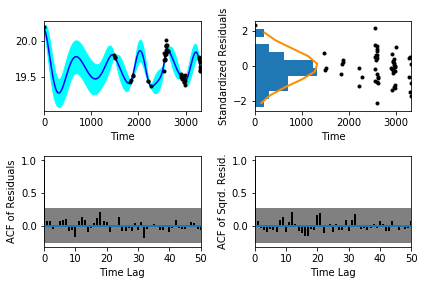

In [6]:
sample.assess_fit()

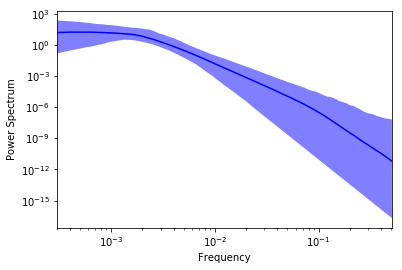

In [7]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [8]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

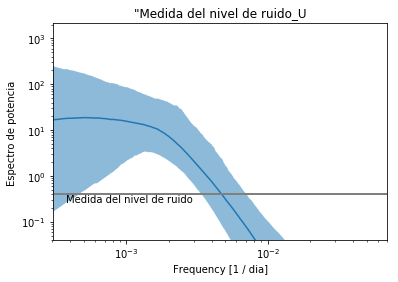

In [9]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_142916_U')
plt.title('"Medida del nivel de ruido_U')
plt.savefig("Medida del nivel de ruido_U.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_142916_U')

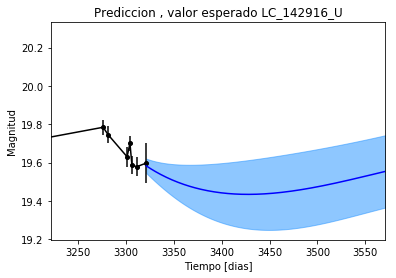

In [10]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_142916_U')

Text(0.5,1,'Prediccion, Caminos simulados  LC_142916_U')

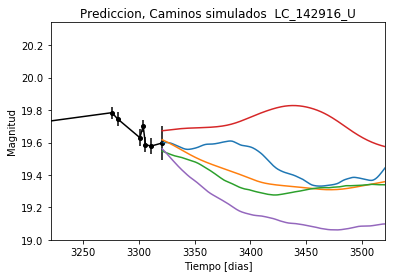

In [11]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_142916_U')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


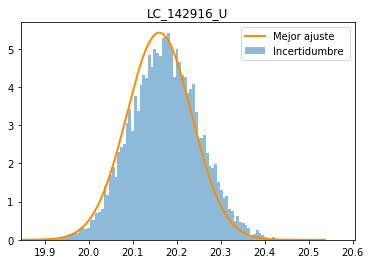

In [12]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_142916_U')
plt.savefig("Mejor_ajuste_LC_142916_U.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_142916_U')

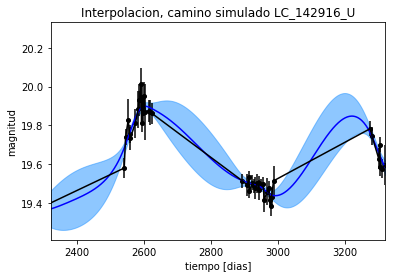

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_142916_U')

Text(0.5,1,'Interpolacion, camino simulado LC_142916_U')

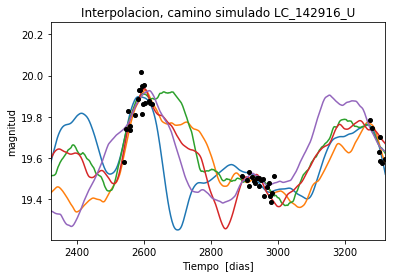

In [14]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_142916_U')

In [15]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [16]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 1010.92242707
Median: 0.00233892066436
Standard deviation: 0.155163834596
68% credibility interval: [ 0.00052699  0.05027669]
95% credibility interval: [  3.24398103e-04   6.59790180e-01]
99% credibility interval: [  3.07374633e-04   9.16238190e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 503.618402798
Median: 0.00124978121223
Standard deviation: 0.0639618436901
68% credibility interval: [ 0.00044623  0.00986652]
95% credibility interval: [ 0.00031685  0.13464336]
99% credibility interval: [  3.05014288e-04   5.22893176e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 453.960144461
Median: 0.00770128094309
Standar

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 624.531983048
Median: 90.909547311
Standard deviation: 1.73903223062
68% credibility interval: [ 88.89682117  92.1578132 ]
95% credibility interval: [ 86.23770908  92.95753205]
99% credibility interval: [ 84.18232363  93.26633697]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 526.326115208
Median: 0.319684970944
Standard deviation: 1.76770495149
68% credibility interval: [ 0.03756732  2.73931558]
95% credibility interval: [ 0.01294061  6.08871417]
99% credibility interval: [ 0.01036808  8.97984361]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 548.644546345
Median: 0.0707385271941
Standard deviation: 7.18880754398
68% credibility interval: [  2.45120096e-03   2.78155719e+00]
95% credibility interval: [  5.

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 16083.3460073
Median: 2.51121132555e-10
Standard deviation: 8.89613900838e+111
68% credibility interval: [  3.14987985e-34   2.14996317e+43]
95% credibility interval: [  4.73432239e-67   7.90172518e+73]
99% credibility interval: [  7.47362454e-83   1.12102071e+80]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 695.015216323
Median: 19.6309185575
Standard deviation: 0.154878777958
68% credibility interval: [ 19.53778217  19.76776771]
95% credibility interval: [ 19.4036667   20.03045205]
99% credibility interval: [ 19.24011726  20.25533595]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 315.947026587
Median: 0.00238019647277
Standard deviation: 0.21370849903
68% credibility interval: [ 0.          0.19936295]
95% credibility interval: [ 0.          0.84846413]
99% credibility interval: [ 0.          0.98117404]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 315.947026587
Median: 0.00238019647277
Standard deviation: 0.21370849903
68% credibility interval: [ 0.          0.19936295]
95% credibility interval: [ 0.          0.84846413]
99% credibility interval: [ 0.          0.98117404]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 231.973199372
Median: 0.0
Standard deviation: 0.000810222307649
68% cr

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 624.531983048
Median: 90.909547311
Standard deviation: 1.73903223062
68% credibility interval: [ 88.89682117  92.1578132 ]
95% credibility interval: [ 86.23770908  92.95753205]
99% credibility interval: [ 84.18232363  93.26633697]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2730.60777234
Median: 0.0890014765539
Standard deviation: 0.134068661981
68% credibility interval: [ 0.05166486  0.17234289]
95% credibility interval: [ 0.03319518  0.44144598]
99% credibility interval: [ 0.02705617  0.93471395]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1037.75783319
Median: 0.877315078445
Standard deviation: 0.139782758144
68% credibility interval: [ 0.75149473  1.02278686]
95% credibility interval: [ 0.65950801  1.20325306]
99% credibility interval: [ 0.61092104  1.33512863]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 666.737405625
Median: 1.95916510827e-05
Standard deviation: 0.0061837933871
68% credibility interval: [  7.77215282e-47   1.67020404e-03]
95% credibility interval: [  5.63329614e-79   1.59004301e-02]
99% credibility interval: [  3.12229382e-85   3.50555310e-02]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 1010.92242707
Median: (-0.014695871953-0.0247434654014j)
Standard deviation: 1.65936935177
68% credibility interval: [-0.31589775-0.03286695j -0.00331117-0.01661972j]
95% credibility interval: [ -4.14558396e+00+0.j          -2.03825339e-03-0.00725744j]
99% credibility interval: [ -5.75689433e+00+0.j          -1.93129178e-03-0.00492021j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 503.618402798
Median: (-0.00785260694986+0.385780066664j)
Standard deviation: 1.40162134244
68% credibility interval: [-0.06199315+0.04709673j -0.00280374+0.j        ]
95% credibility interval: [-0.84598921+0.67109949j -0.00199084+0.00915902j]
99% credibility interval: [ -3.28543472e+00+3.50918621j  -1.91646129e-03+0.j        ]
Posterior s